In this dataset, we try to predict whether a passanger survived from the accident or not through some feature

In [2]:
#First, import the library needed
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
#Load the file
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')

In [4]:
#Take a gilmse of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

# Data Analysis

In this section, we try to understand more about the data

# Missing Data

In [6]:
#Find out if there's missing data in the dataframe
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

We can see that the column 'Age', 'Cabin', and 'Embarked' have some missing value

In [7]:
#Divide the null value into seperate variable
null_feature = [feature for feature in df.columns if (df[feature].isnull().sum())>0]
null_feature

['Age', 'Cabin', 'Embarked']

In [8]:
#Find out whether the feature that have missing value is a numerical data(discrete, continuous, or temporal) or a categorical
categ_null=[feature for feature in null_feature if (df[feature].dtype)=='O']
num_null = [feature for feature in null_feature if feature not in categ_null]

print('Categorical Feature',categ_null, 'Numerical Feature',num_null)

Categorical Feature ['Cabin', 'Embarked'] Numerical Feature ['Age']


# Missing Data - Age Column

Here we can see that we only have one numerical feature, which is Age. Next we try to find out what we can do with the missing data

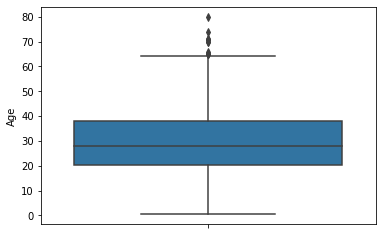

In [9]:
#Find out if the Age have an outliers
sns.boxplot(y=df['Age'])

We can see that the Age column have some outliers. Therefore, we cannot replace the missing value with the mean. 
We can try to replace it with median but we have too much missing data. So we can try to replace the age based on the salutations of the name of passengers (eg., Mr, Mrs, Ms, Master)

In [11]:
#Divide it into each salutations
import math

mrs_age = [df['Age'][i] for i in range(len(df)) if 'Mrs.' in df['Name'][i] and math.isnan(df['Age'][i])==False]
mr_age = [df['Age'][i] for i in range(len(df)) if 'Mr.' in df['Name'][i] and math.isnan(df['Age'][i])==False]
ms_age = [df['Age'][i] for i in range(len(df)) if 'Miss.' in df['Name'][i] and math.isnan(df['Age'][i])==False]
master_age = [df['Age'][i] for i in range(len(df)) if 'Master.' in df['Name'][i] and math.isnan(df['Age'][i])==False]

In [13]:
#Calculate the median 
mrs_age_median = np.median(mrs_age)
mr_age_median = np.median(mr_age)
ms_age_median = np.median(ms_age)
master_age_median = np.median(master_age)

data = [df['Age'][i] for i in range(len(df)) if math.isnan(df['Age'][i])==False]
median_all = np.median(data)

I decided to replace the missing value with the median value based on the salutations of the name of passengers. NaN value without salutations on their name will be replace with the median of the whole data

Text(0.5, 0, 'Age')

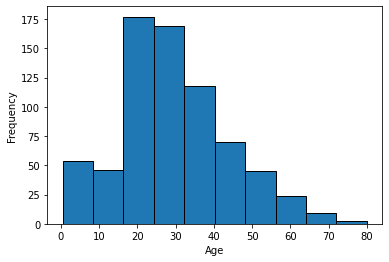

In [14]:
#Look at the distribution of the age
df['Age'].plot.hist(edgecolor='black')
plt.xlabel('Age')

In [15]:
for i in range(len(df)):
    if math.isnan(df['Age'][i])==True:
        if 'Mrs.' in df['Name'][i]:
            df['Age'][i] = mrs_age_median
        if 'Mr.' in df['Name'][i]:
            df['Age'][i] = mr_age_median
        if 'Miss.' in df['Name'][i]:
            df['Age'][i] = ms_age_median
        if 'Master.' in df['Name'][i]:
            df['Age'][i] = master_age_median
        else :
            df['Age'][i] = median_all

<ipython-input-15-844c76037960>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = mr_age_median
<ipython-input-15-844c76037960>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = median_all
<ipython-input-15-844c76037960>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = mrs_age_median
<ipython-input-15-844c76037960>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

You can see that now there's no missing value in Age Column

# Missing data - Cabin and Embarked Column

In [17]:
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [18]:
df.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C101           1
D50            1
C7             1
C85            1
D49            1
Name: Cabin, Length: 147, dtype: int64

As we can see the Cabin column have more than 50% missing data so we can just drop it

In [19]:
df.drop('Cabin', axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df.Embarked.isnull().sum()

2

The missing value in Embarked column is only 2 values. We can replace the missing value with the mode.

In [22]:
df['Embarked']=df.Embarked.fillna('S')

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we're done with the missing value

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [25]:
for i in df.columns:
    print(i, len(df[i].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Embarked 3


From the data above, we can see that some of the feature have the same unique length as the data length. So we can drop it.

In [26]:
df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

Text(0.5, 0, 'Fare')

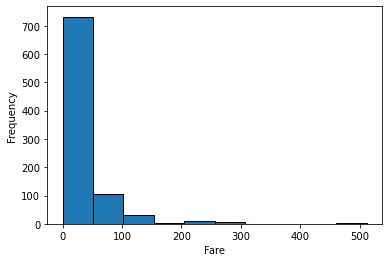

In [27]:
#See the distribution of fare column
df['Fare'].plot.hist(bins=10,edgecolor='black')
plt.xlabel('Fare')

C:\Users\Dinda\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


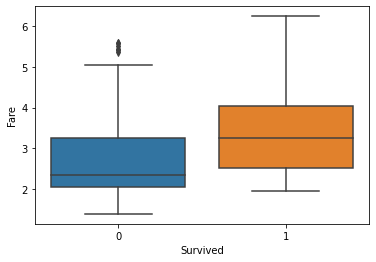

In [28]:
sns.boxplot(y=np.log(df['Fare']), x=df['Survived'])

We can see that the people who pay more is more likely to survived

Let's see if the fare have a relation with the PClass

C:\Users\Dinda\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


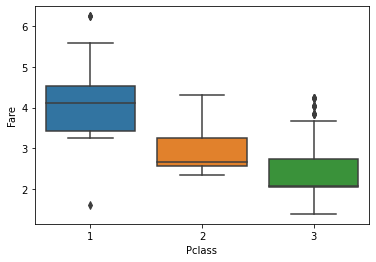

In [29]:
sns.boxplot(y=np.log(df['Fare']), x=df['Pclass'])

We can see that Fare is related to PClass where higher Class have bigger Fare than others.
Now, let's see if PClass have a relation with Survived

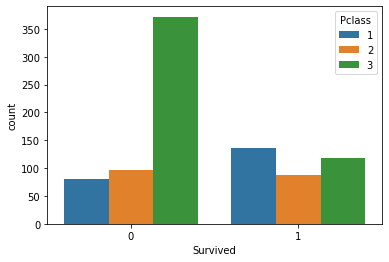

In [30]:
sns.countplot(x='Survived', hue='Pclass', data=df)

We can see that lower class passanger have the biggest probability for not surviving and the first class have biggest probability to survived.

Let's see the relation between Sex and Survived

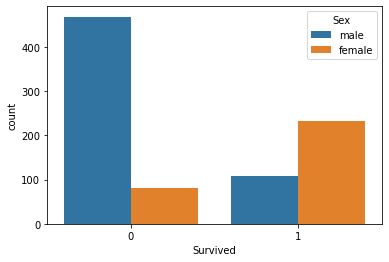

In [31]:
sns.countplot(x='Survived', hue='Sex', data=df)

We can see that female have a bigger chance to survived than male. Probably because female was prioritized to go to the safety boat first.
As I know, kids also prioritized to save first. Let's see the relation of Age and Survived

Text(0.5, 0, 'Age')

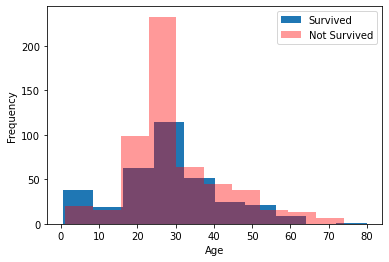

In [32]:
survived = df['Survived']==1
df['Age'][survived].plot.hist(label='Survived')
df['Age'][-survived].plot.hist(color='red', alpha=0.4,label='Not Survived')
plt.legend()
plt.xlabel('Age')

From the graph we can see that the passanger who's younger have bigger chance of surviving. This is probably because kids were also prioritized to be saved first.
It should've been the same with elder, but here we can see that most of the elder passanger did not survived. 

Text(0.5, 0, 'Age')

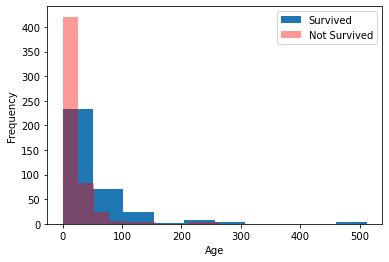

In [33]:
survived = df['Survived']==1
df['Fare'][survived].plot.hist(label='Survived')
df['Fare'][-survived].plot.hist(color='red', alpha=0.4,label='Not Survived')
plt.legend()
plt.xlabel('Age')

Let's see the relation of the rest of the feature and the dependent variable

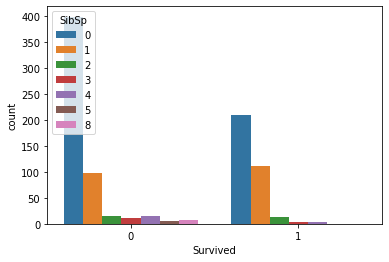

In [34]:
sns.countplot(x='Survived', hue='SibSp', data=df)

We cannot see much relation between these two but we can see that passanger who have 1 siblings/spouses abroad have bigger chance of surviving

Sibsp - Number of Siblings/Spouses Aboard. 

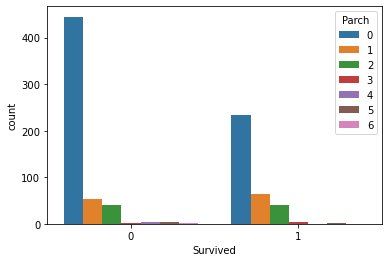

In [35]:
sns.countplot(x='Survived', hue='Parch', data=df)

Same as before, we cannot see much relation between these two but we can see that passanger who have 1 parents/children abroad have bigger chance of surviving

Parch - Number of Parents/Children Aboard

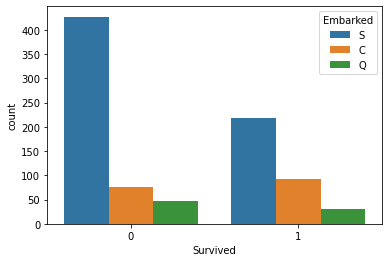

In [36]:
sns.countplot(x='Survived', hue='Embarked', data=df)

# Feature Engineering

In [37]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Here we can see that we still have categorical feature. We have to convert it into numerical values before passing it into a Machine Learning model

In [38]:
#Converting the categorical values into numerical
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_embark = LabelEncoder()
df['Embarked'] = le_embark.fit_transform(df['Embarked'])

In [39]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Okay, we're done. Next we will do feature selection

# Feature Selection

In [40]:
#First, we determine the X and y variable
#X is the independent variable
#y is the dependent variable
X = df.drop('Survived',axis=1)
y = df['Survived']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [41]:
#Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 1)

In [42]:
#Here we will try to compare the Logistic Regression and Decision Tree Method

#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train,y_train)
log_reg

y_predict_log = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_log)

0.7784011220196353

In [43]:
#Decision Tree Method
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

dec_tree.score(X_test, y_test)

0.7727910238429172

Here we can see that both method give the same result

In [44]:
y_predict_log

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

In [45]:
df.shape

(891, 8)